In [1]:
import warnings

warnings.simplefilter(
    action='ignore',
    category=FutureWarning
)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import ipywidgets as widgets
from IPython.display import display

In [3]:
from hmt.lib.fins import (
    FinUniformAtr,
    FinPiniformRectangular,
    FinPiniformTriangular,
    FinPiniformParabolic,
    FinPlanarRectangular,
    FinPlanarTriangular,
    FinPlanarParabolic,
    FinAnnular
)

In [4]:
sb.set_context(
    "talk",
    font_scale=1.2
)

sb.set_style(
    "darkgrid"
)

layout = widgets.Layout(
            width="50%"
         )

style = {"description_width": "initial"}

### Exercício 3.103 do Livro-texto

Um bastão de latão com $100 mm$ de comprimento e $5 mm$ de diâmetro se estende horizontalmente a partir de uma peça a $200 °C$. O bastão encontra-se em um ambiente com $T_\infty = 20 °C$ e $h = 30 W/(m^2 K)$. Quais são as temperaturas no bastão a $25$, $50$ e $100 mm$ da peça?

R: Consultando o apêndice A para a condutividade do latão a $\approx 110 ºC$ (temperatura média):

In [5]:
Tm = 110.0 + 273.15 # K

T1 = 200.0 # K 
k1 = 95.0 # W/(mK)

T2 = 400.0 # K 
k2 = 137.0 # W/(mK)

# Quick linear interpolation for a more accurate results
kLatao = k1 + (Tm - T1)*(k2 - k1)/(T2 - T1)
kLatao

133.4615

Aleta piniforme com área de seção uniforme. Todas as equação são bem estabalecidas e disponíveis no livro-texto, na seção de Aletas de seção uniforme. Neste caso, a distribuição de temperaturas pode ser obtida explicitamente por alguma das equações da Tabela 3.4. Lembre-se que, como vimos em aula, o modelo de aleta infinita é adequada se $L \le \frac{2.65}{m}$, assim, a rigor, neste caso onde conhecemos o comprimento da aleta, podemos verificar se este modelo é adequado.

In [6]:
# Instantiate piniform fin
# Si units: always!
exL = 100e-3
exD = 5e-3
exh = 30.0
exk = kLatao
exTinf = 20.0
exTbase = 200.0

pinFin = FinPiniformRectangular(
            length=exL,
            diameter=exD,
            htc=exh,
            k=exk,
            Tinf=exTinf,
            Tbase=exTbase
       )

In [7]:
pinFin.getmCoeffFin()*exL

1.3409964249041064

Como $mL < 2.65$, então não é "seguro" usar o modelo de aleta infinita. Assim, podemos prosseguir com os cálculos. Neste caso, vamos usar como base a condição com convecção na extremidade, como nada mais foi informado no problema (note: isto vai depender do problema). Podemos usar o código em Python neste caso pois ele está implementado com a condição de extremidade convectiva.

In [8]:
# Now we can easily get the temperatures in each position
pinFin.getTemperature(25e-3)

156.36033300779658

In [9]:
# Now we can easily get the temperatures in each position
pinFin.getTemperature(50e-3)

128.19055184019888

In [10]:
# Now we can easily get the temperatures in each position
pinFin.getTemperature(100e-3)

106.86983568396964

### Exercício 3.99 do livro-texto

Pás de turbina montadas sobre um disco rotativo em um motor de turbina a gás estão expostas a uma corrente de gás a $T_\infty = 1200 °C$, que mantém um coeficiente de transferência convectiva de calor sobre a pá de $h = 250 W/(m^2 K)$. As pás, fabricadas em Inconel, $k \approx 20 W/(m K)$, têm um comprimento $L = 50 mm$. O perfil da pá possui uma área de seção transversal uniforme $A_{tr} = 6 \times 10^{−4} m^2$ e um perímetro $P = 110 mm$. Um sistema proposto para o resfriamento das pás, que envolve a passagem de ar pelo disco de suporte, é capaz de manter a base de cada pá a uma temperatura de $T_b = 300 °C$.

1. Sendo a temperatura máxima permissível para a pá de $1050 °C$ e a extremidade da pá podendo ser considerada adiabática, o sistema de resfriamento proposto é satisfatório?

2. Para o sistema de resfriamento proposto, qual é a taxa na qual o calor é transferido de cada pá para o ar de resfriamento?

In [11]:
# Instantiate piniform fin
# Si units: always!
exL = 50e-3       # m
exAreaTr = 6.0e-4 # m2
exP = 110.0e-3    # m
exh = 250.0       # W/m2K
exk = 20.0        # W/mK
exTinf = 1200.0   # Celsius
exTbase = 300.0   # Celsius

# Maximum temperature admissible in the fin
exTmax = 1050.0   # Celsius

We can use the ´FinUniformAtr´ to specify a fin with a generic section other then the piniform or rectangular cases. But in this case, we need to provide $A_{tr}$ and $P$: 

In [12]:
pinFin = FinUniformAtr(
            length=exL,
            htc=exh,
            k=exk,
            Tinf=exTinf,
            Tbase=exTbase,
            area_tr=exAreaTr,
            perimeter=exP
       )

Os modelos descritos na Tabela 3.4 do livro-texto estão implementados aqui para aletas com área de seção uniforme e podem ser escolhidos nas funções "getTemperature()" e "getHeatTransfer()" das aletas instanciadas através do argumento "model". veja os exemplos:

In [13]:
pinFin.getTemperature(exL, model="convective_tip")

1070.315519441061

In [14]:
pinFin.getTemperature(exL, model="adiabatic_tip")

1037.0126765847374

In [15]:
pinFin.getHeatTransfer(model="convective_tip")

-511.98480950797136

In [16]:
pinFin.getHeatTransfer(model="adiabatic_tip")

-508.46198844550463

No item 1., devemos calcular a distribuição de temperaturas na aleta toda e verificar se algum ponto estará com $T > 1050 C$. Se isto ocorrer, significa que o sistema de resfriamento não está sendo capaz de manter a temperatura da aleta abaixo da temperatura admissível.

O código a seguir faz um gráfico da temperatura ao longo da aleta para este problema:

<Axes: xlabel='x (m)', ylabel='T (ºC)'>

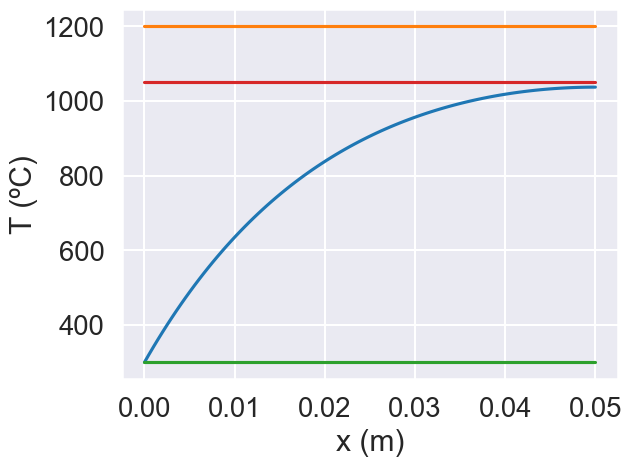

In [17]:
xRange = np.linspace(0, exL, 100)

fig, ax = plt.subplots()

sb.lineplot(
    x=xRange,
    y=np.array([
        pinFin.getTemperature(
            x,
            model="adiabatic_tip"
        ) for x in xRange
    ]),
    ax=ax
)

ax.set(
    xlabel="x (m)",
    ylabel="T (ºC)",
    # ylim=(exTbase, exTinf)
)

# Plot line to identify max and min
sb.lineplot(x=xRange, y=exTinf)
sb.lineplot(x=xRange, y=exTbase)
sb.lineplot(x=xRange,y=exTmax)

Note que a temperatura da aleta não atinge $1050 ºC$ ao longo do seu comprimento. Assim, o sistema de resfriamento está sendo útil. A temperatura na extremidade da aleta e a taxa total de transferência de calor são:

In [18]:
pinFin.getTemperature(exL, model="adiabatic_tip")

1037.0126765847374

In [19]:
pinFin.getHeatTransfer(model="adiabatic_tip")

-508.46198844550463

Note que usamos o modelo de extremidade adiabática. Entretantom faça os mesmo cálculos com o modelo de extremidade convectiva e você verá que a temperatura próxima à extremidade é maior que o limite! Assim, devemos selctionar cuidadosamente o modelo de acordo com o problema!